<a href="https://colab.research.google.com/github/Zainaazar/Image-Classification/blob/main/mushroom_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -- ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
x = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [ ]:
# Clean x
x = x[~x.isin(['?']).any(axis=1)]

# Align y with cleaned x
x, y = x.align(y, axis=0, join='inner')

In [ ]:
x.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:

x.drop(columns="stalk-root", inplace= True)

In [ ]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
x.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [ ]:
OHE= OneHotEncoder()

In [ ]:
x_encoded = OHE.fit_transform(x)

In [ ]:
X = pd.DataFrame(x_encoded.toarray(), columns=OHE.get_feature_names_out(x.columns))

# Train_Test_Split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# y= y['poisonous'].map({'p': 0, 'e': 1})

In [ ]:
model= DecisionTreeClassifier(max_depth= 5, random_state=42)


In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
print('Acuraccy Score=', accuracy_score(y_test, y_pred)*100)

Acuraccy Score= 100.0


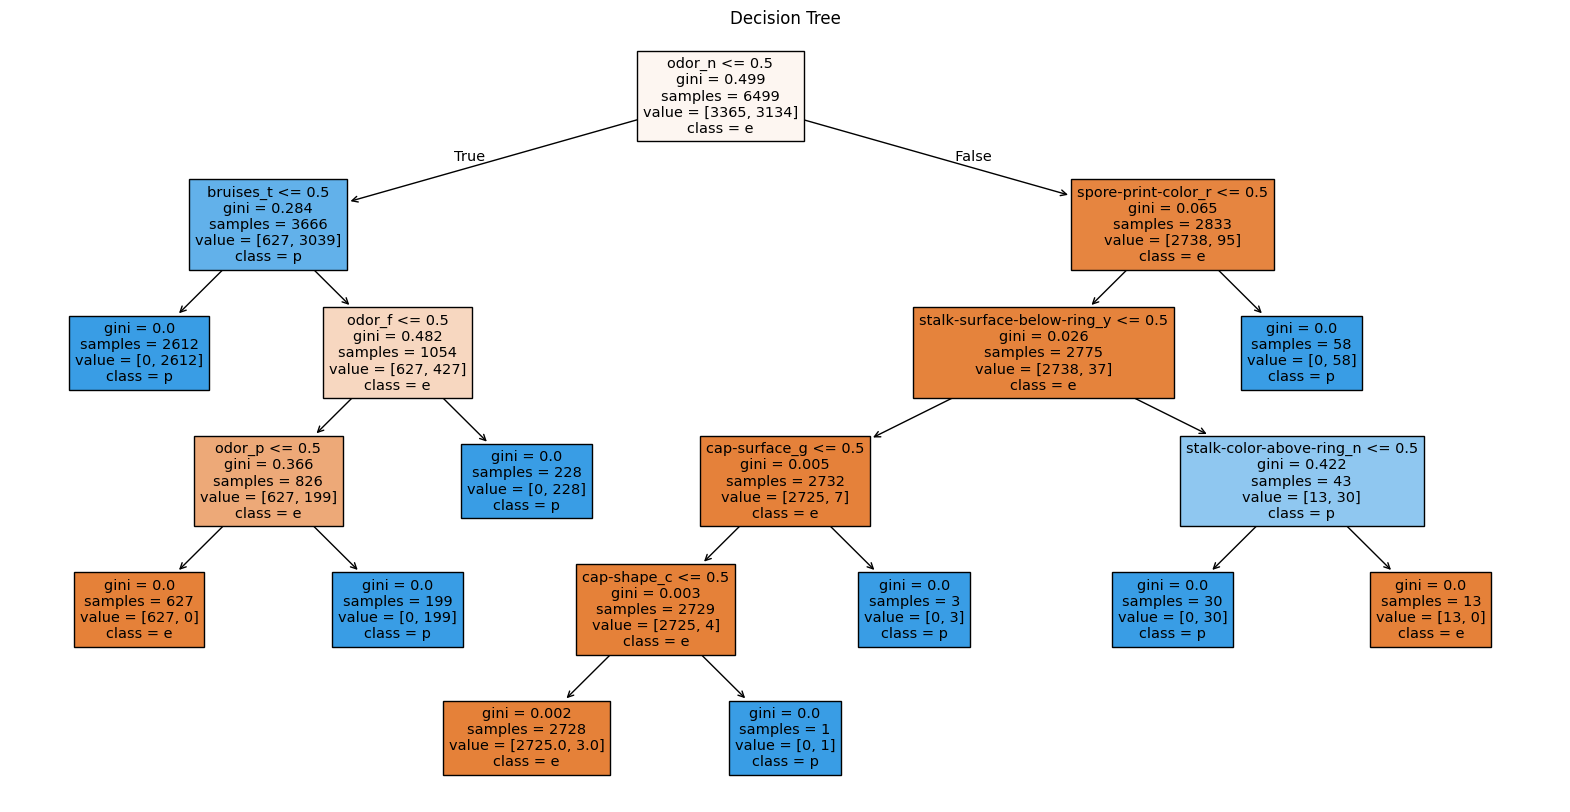

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['e', 'p'], filled=True)
plt.title('Decision Tree')
plt.show()

#Cross_Validate

In [ ]:
score= cross_validate(model, X, y, cv=5, return_estimator=True)

In [ ]:
trained_model= score['estimator'][0]

In [ ]:
print(" Cross validation score: ", score['test_score'], '\n Cross Validation score avarage: ', np.mean(score['test_score']))

 Cross validation score:  [1.         0.99938462 0.99569231 1.         0.98522167] 
 Cross Validation score avarage:  0.9960597195907541


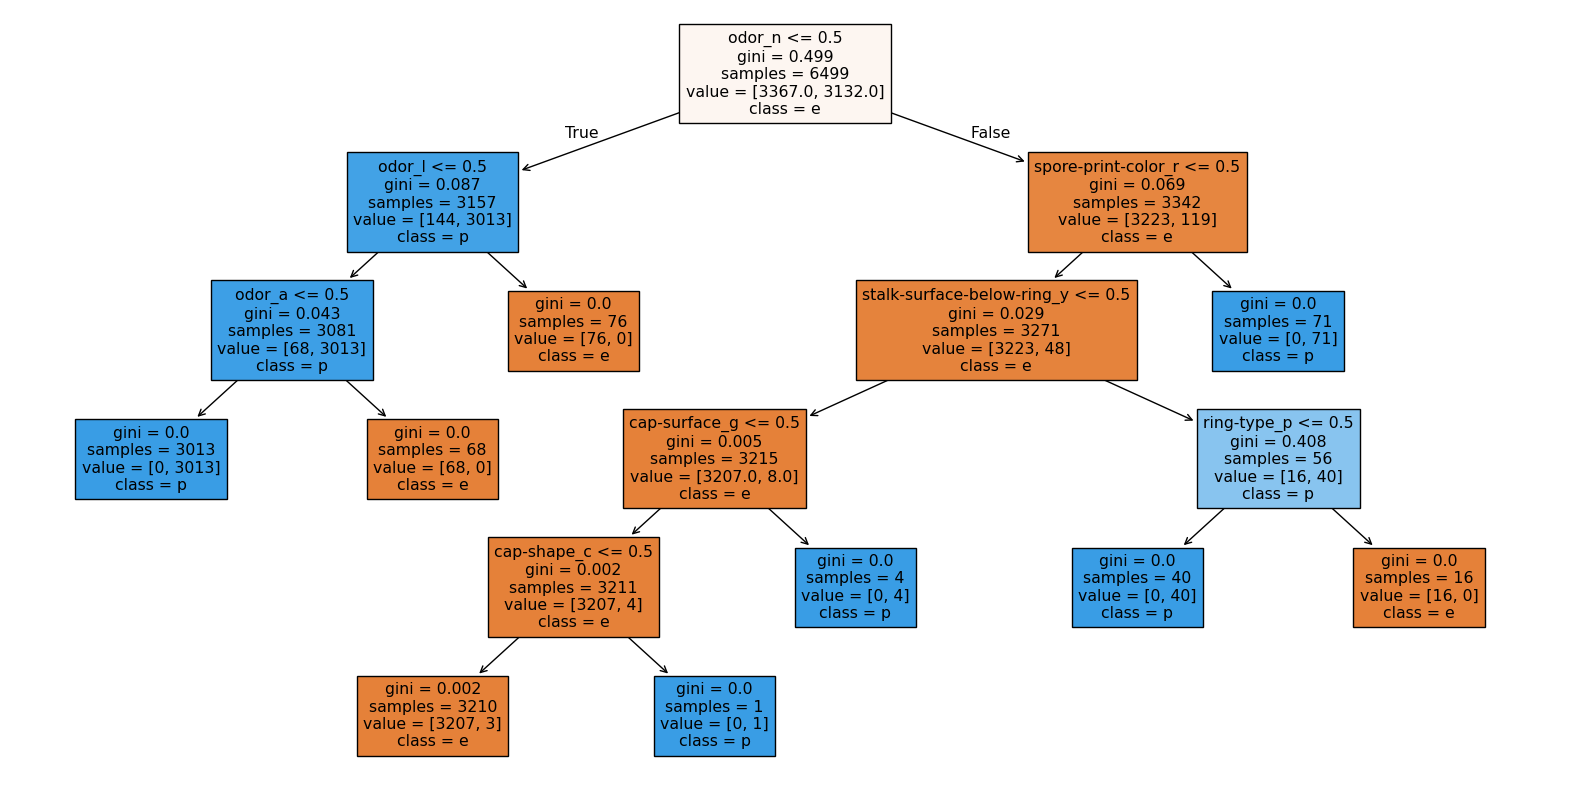

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(trained_model, feature_names=X.columns, class_names=['e', 'p'], filled= True)
plt.show()